# Individual Assignment Task 2 Done in Python

In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as st
import seaborn as sns

## Data

In [2]:
filename = 'HR_data.csv'
data = pd.read_table(filename, sep=',', engine='python')
#data

In [3]:
# 'Classes'
data_classes = data.iloc[:, 7:13].copy()
data_classes

,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,round_3,phase3,1,1,1,D1_1
1,round_3,phase2,1,1,5,D1_1
2,round_3,phase1,1,1,0,D1_1
3,round_2,phase3,1,1,1,D1_1
4,round_2,phase2,1,1,5,D1_1
...,...,...,...,...,...,...
163,round_4,phase2,14,0,8,D1_2
164,round_4,phase1,14,0,0,D1_2
165,round_1,phase3,14,0,1,D1_2
166,round_1,phase2,14,0,4,D1_2


In [4]:
# Valuables
data_values = data.iloc[:, 1:7].copy()
#data_values
new_df = pd.concat([data_values.head(5),data_values.tail(5)],ignore_index=False)

In [5]:
# Convert data values to latex table
#dummy_row = pd.DataFrame([['...'] * data_values.shape[1]], columns=data_values.columns)
#dummy_row.index = ['...']
#result_df = pd.concat([new_df.iloc[:5], dummy_row, new_df.iloc[5:]])
#print(result_df.to_latex(
#    index=True,
#    float_format="{:.2f}".format
#))

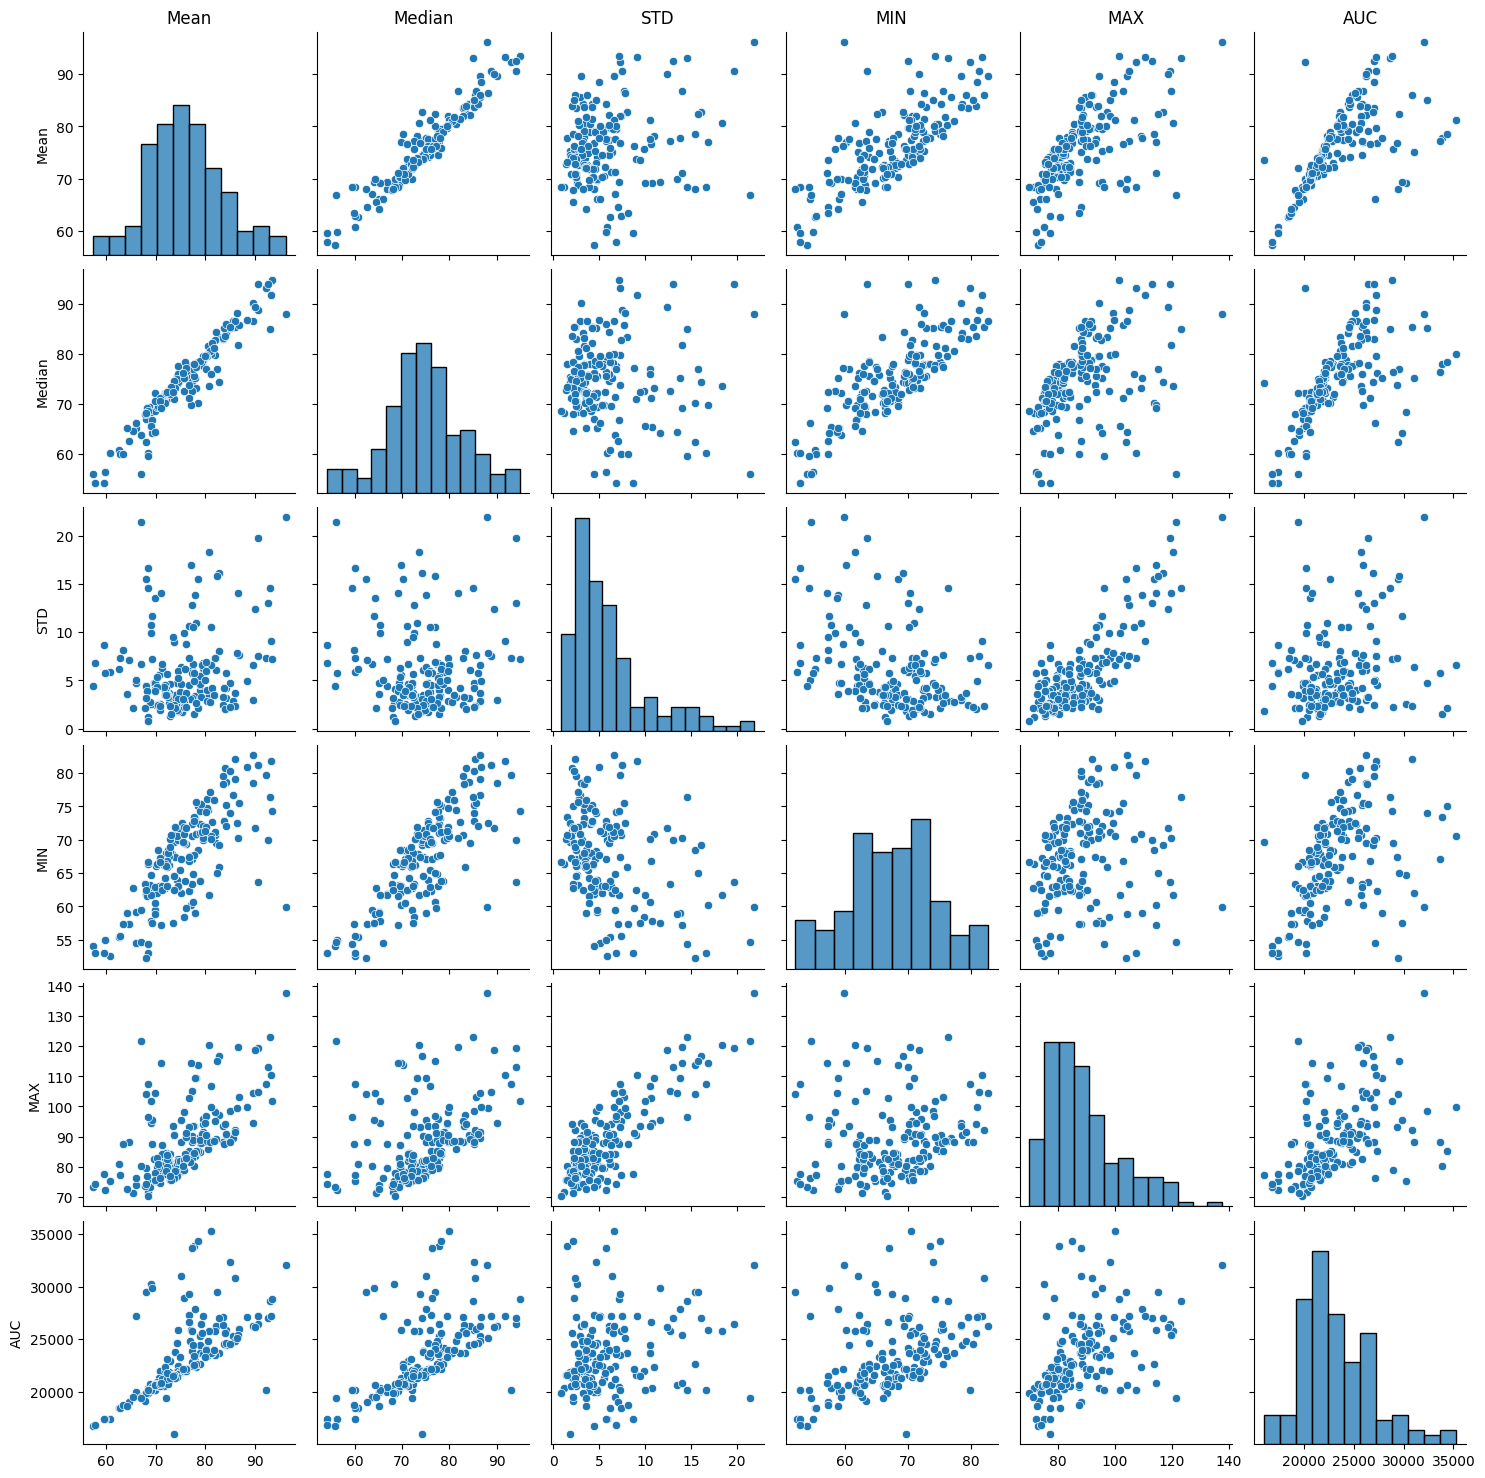

In [6]:
# Scatterplotting the values against eachother

vars = ['Mean', 'Median', 'STD','MIN', 'MAX','AUC']
scatterbanter = sns.pairplot(data_values)

# Remove the default labels
for ax in scatterbanter.axes.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')

# Manually add labels on the top
for ax, col in zip(scatterbanter.axes[0], vars):
    ax.set_title(col)

# Manually add labels on the left
for ax, row in zip(scatterbanter.axes[:,0], vars):
    ax.set_ylabel(row, rotation=90)

plt.show()

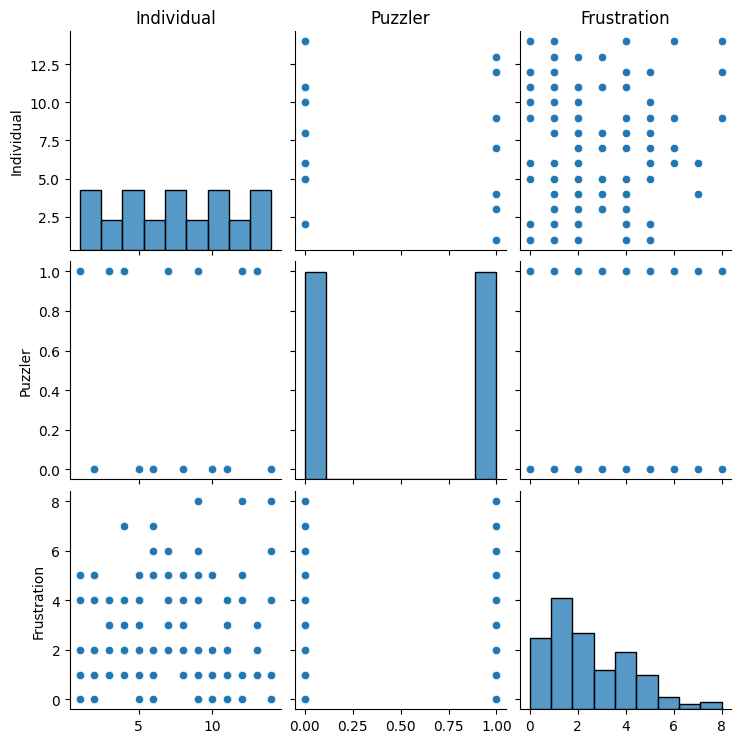

In [7]:
vars = ['Individual','Puzzler','Frustration']
scatterbanter = sns.pairplot(data_classes)

# Remove the default labels
for ax in scatterbanter.axes.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')

# Manually add labels on the top
for ax, col in zip(scatterbanter.axes[0], vars):
    ax.set_title(col)

# Manually add labels on the left
for ax, row in zip(scatterbanter.axes[:,0], vars):
    ax.set_ylabel(row, rotation=90)

plt.show()

In [8]:
data

,Unnamed: 0,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,0,77.965186,78.000,3.345290,73.23,83.37,22924.945,round_3,phase3,1,1,1,D1_1
1,1,70.981097,70.570,2.517879,67.12,78.22,21930.400,round_3,phase2,1,1,5,D1_1
2,2,73.371959,73.360,3.259569,67.88,80.22,21647.085,round_3,phase1,1,1,0,D1_1
3,3,78.916822,77.880,4.054595,72.32,84.92,25258.905,round_2,phase3,1,1,1,D1_1
4,4,77.322226,74.550,6.047603,70.52,90.15,23890.565,round_2,phase2,1,1,5,D1_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,163,73.594539,72.380,9.474556,57.43,93.53,21482.985,round_4,phase2,14,0,8,D1_2
164,164,57.839897,54.130,6.796647,52.97,74.14,16825.740,round_4,phase1,14,0,0,D1_2
165,165,64.237295,65.195,3.589241,58.97,72.63,18691.065,round_1,phase3,14,0,1,D1_2
166,166,70.834320,70.440,2.391160,66.65,76.07,20753.005,round_1,phase2,14,0,4,D1_2


In [9]:
# Binarization of classes in case they have an influential meaning
data['Round_1'] = (data['Round'] == 'round_1').astype(int)
data['Round_2'] = (data['Round'] == 'round_2').astype(int)
data['Round_3'] = (data['Round'] == 'round_3').astype(int)
data['Round_4'] = (data['Round'] == 'round_4').astype(int)

data['Phase_1'] = (data['Phase'] == 'phase1').astype(int)
data['Phase_2'] = (data['Phase'] == 'phase2').astype(int)
data['Phase_3'] = (data['Phase'] == 'phase3').astype(int)

data['Cohort11'] = (data['Cohort'] == 'D1_1').astype(int)
data['Cohort12'] = (data['Cohort'] == 'D1_2').astype(int)

# Saving these new binarizations . Moved individual to the end (Seeing as this is just a grouping for the data) and removed the 'unknown' variable. This means 16 features.
transformed_data = data[['HR_Mean','HR_Median','HR_std','HR_Min','HR_Max','HR_AUC','Round_1','Round_2','Round_3','Round_4','Phase_1','Phase_2','Phase_3','Puzzler','Cohort11','Cohort12','Frustrated','Individual']]
transformed_data

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round_1,Round_2,Round_3,Round_4,Phase_1,Phase_2,Phase_3,Puzzler,Cohort11,Cohort12,Frustrated,Individual
0,77.965186,78.000,3.345290,73.23,83.37,22924.945,0,0,1,0,0,0,1,1,1,0,1,1
1,70.981097,70.570,2.517879,67.12,78.22,21930.400,0,0,1,0,0,1,0,1,1,0,5,1
2,73.371959,73.360,3.259569,67.88,80.22,21647.085,0,0,1,0,1,0,0,1,1,0,0,1
3,78.916822,77.880,4.054595,72.32,84.92,25258.905,0,1,0,0,0,0,1,1,1,0,1,1
4,77.322226,74.550,6.047603,70.52,90.15,23890.565,0,1,0,0,0,1,0,1,1,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,73.594539,72.380,9.474556,57.43,93.53,21482.985,0,0,0,1,0,1,0,0,0,1,8,14
164,57.839897,54.130,6.796647,52.97,74.14,16825.740,0,0,0,1,1,0,0,0,0,1,0,14
165,64.237295,65.195,3.589241,58.97,72.63,18691.065,1,0,0,0,0,0,1,0,0,1,1,14
166,70.834320,70.440,2.391160,66.65,76.07,20753.005,1,0,0,0,0,1,0,0,0,1,4,14


# Data splitting

In [10]:
# Copy so we dont alter the original data
df = transformed_data.copy()

# Chronological Order
order = {
    'Round_1': {'Phase_1': 1, 'Phase_2': 2, 'Phase_3': 3},
    'Round_2': {'Phase_1': 4, 'Phase_2': 5, 'Phase_3': 6},
    'Round_3': {'Phase_1': 7, 'Phase_2': 8, 'Phase_3': 9},
    'Round_4': {'Phase_1': 10, 'Phase_2': 11, 'Phase_3': 12}
}

# Sorting column method
df['sort'] = df.apply(lambda row: sum([order[round][phase] for round in ['Round_1', 'Round_2', 'Round_3', 'Round_4'] for phase in ['Phase_1', 'Phase_2', 'Phase_3'] if row[round] == 1 and row[phase] == 1]), axis=1)
df.sort_values(by=['sort','Individual'], inplace=True) # Added individual as a criteria just to make the data pretty, can be removed then the data will be shuffled (Not randomly...?)
df.drop(columns='sort', inplace=True) # Make sure to remove sort or you gonna fuck up your data...
#df #Take a look at the data to see if it looks like you want it

In [11]:
# Time Series Split
from sklearn.model_selection import TimeSeriesSplit , KFold

X = df.drop(labels=['Frustrated'], axis=1) # Features
y = df['Frustrated'] # Target

tscv = TimeSeriesSplit(n_splits = 11)

# Saving a K-fold just in case... Luckily KFold and TimeSeriesSplit operate in the same way (Taking code into account and not in reality)
kf = KFold(n_splits=5)

# Models

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [13]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=10000,solver='liblinear')
# Linear Support Vector Machine (Change to something else?)
svm_model = SVC(kernel="linear", C=1.0, random_state=42)
# Decision tree
dt_model = DecisionTreeClassifier(min_samples_split = 2)
# Random Forest
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
# XGBoost
#XGB_model = XGBClassifier(eta=0.3)

# Data evaluation of the given models

## Data Evaluation

In [14]:
from sklearn.metrics import accuracy_score
# Add the unoptimized models:
models = [lr_model,svm_model,dt_model,rf_model]
for model in models:
    accuracies = []
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Fit
        model.fit(X_train, y_train)
        # Predict
        y_pred = model.predict(X_test)
        # Conclude
        accuracy = accuracy_score(y_test, y_pred)
        # Fetch
        accuracies.append(accuracy)
        #print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy}")
    
    mean_accuracy = sum(accuracies)/len(accuracies)
    print(f"Model: {model.__class__.__name__}, Mean Accuracy: {mean_accuracy}")

Model: LogisticRegression, Mean Accuracy: 0.2532467532467532
Model: SVC, Mean Accuracy: 0.22077922077922077
Model: DecisionTreeClassifier, Mean Accuracy: 0.2337662337662338
Model: RandomForestClassifier, Mean Accuracy: 0.2662337662337662


In [15]:
# Preprocessing of Data and test:
from sklearn.preprocessing import StandardScaler
features_to_standardize = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_standardize] = scaler.fit_transform(df_scaled[features_to_standardize])
#df_scaled

In [16]:
# Reload the unoptimized models:
models = [lr_model,svm_model,dt_model,rf_model]

# Scale data
X = df_scaled.drop(labels=['Frustrated'], axis=1)
y = df_scaled['Frustrated']

# List for all accuracies
model_accuracies_scaled = []

for model in models:
    accuracies = []
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Fit
        model.fit(X_train, y_train)
        # Predict
        y_pred = model.predict(X_test)
        # Conclude
        accuracy = accuracy_score(y_test, y_pred)
        # Fetch
        accuracies.append(accuracy)
        #print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy}")
    
    mean_accuracy = sum(accuracies)/len(accuracies)
    
    # Save the mean accuracy to the list
    model_accuracies_scaled.append(accuracies)

    print(f"Model: {model.__class__.__name__}, Mean Accuracy: {mean_accuracy}")

Model: LogisticRegression, Mean Accuracy: 0.2857142857142857
Model: SVC, Mean Accuracy: 0.2792207792207792
Model: DecisionTreeClassifier, Mean Accuracy: 0.2142857142857143
Model: RandomForestClassifier, Mean Accuracy: 0.2662337662337662


In [17]:
# Preprocessing of Data and test:
from sklearn.preprocessing import StandardScaler
features_to_log = ['HR_std', 'HR_AUC']
scaler = StandardScaler()
df_logged = df.copy()
df_logged[features_to_log] = np.log1p(df_logged[features_to_log])
df_logged[features_to_standardize] = scaler.fit_transform(df_logged[features_to_standardize])

In [18]:
# reload another set of unoptimized models:
models = [lr_model,svm_model,dt_model,rf_model]

# Log AND scale data
X = df_logged.drop(labels=['Frustrated'], axis=1)
y = df_logged['Frustrated']

# List for all accuracies
model_accuracies_logged = []

for model in models:
    accuracies = []
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Fit
        model.fit(X_train, y_train)
        # Predict
        y_pred = model.predict(X_test)
        # Conclude
        accuracy = accuracy_score(y_test, y_pred)
        # Fetch
        accuracies.append(accuracy)
        #print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy}")
    
    mean_accuracy = sum(accuracies)/len(accuracies)

    # Save the mean accuracy to the list
    model_accuracies_logged.append(accuracies)
    
    print(f"Model: {model.__class__.__name__}, Mean Accuracy: {mean_accuracy}")

Model: LogisticRegression, Mean Accuracy: 0.2922077922077922
Model: SVC, Mean Accuracy: 0.2727272727272727
Model: DecisionTreeClassifier, Mean Accuracy: 0.24025974025974028
Model: RandomForestClassifier, Mean Accuracy: 0.2662337662337662


In [19]:
from sklearn.preprocessing import MinMaxScaler
features_to_normalize = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[features_to_normalize] = scaler.fit_transform(df_normalized[features_to_normalize])

In [20]:
# Maybe I should learn how the models fit
models = [lr_model,svm_model,dt_model,rf_model]

# Normalize features
X = df_normalized.drop(labels=['Frustrated'], axis=1)
y = df_normalized['Frustrated']

# List for all accuracies
model_accuracies_normalized = []

for model in models:
    accuracies = []
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Fit
        model.fit(X_train, y_train)
        # Predict
        y_pred = model.predict(X_test)
        # Conclude
        accuracy = accuracy_score(y_test, y_pred)
        # Fetch
        accuracies.append(accuracy)

    # Calculate the mean accuracy
    mean_accuracy = sum(accuracies)/len(accuracies)
    
    # Save the mean accuracy to the list
    model_accuracies_normalized.append(accuracies)
    
    mean_accuracy = sum(accuracies)/len(accuracies)
    print(f"Model: {model.__class__.__name__}, Mean Accuracy: {mean_accuracy}")

Model: LogisticRegression, Mean Accuracy: 0.2662337662337662


Model: SVC, Mean Accuracy: 0.2987012987012987
Model: DecisionTreeClassifier, Mean Accuracy: 0.26623376623376627
Model: RandomForestClassifier, Mean Accuracy: 0.2662337662337662


## Outlier detection

In [21]:
outliers = pd.DataFrame()
heyhey = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']

# Z Score loop
for col in heyhey:
    mean, std = df[col].mean(), df[col].std()
    # THRESHOLD
    threshold = 3
    z_scores = (df[col] - mean) / std
    # Outliers
    outlier_rows = df[z_scores.abs() > threshold].copy()  # make a copy of the data
    outlier_rows['Outlier_Feature'] = col
    outliers = pd.concat([outliers, outlier_rows])
# Remove Dupes
outliers = outliers.loc[~outliers.index.duplicated(keep='first')]

outliers

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round_1,Round_2,Round_3,Round_4,Phase_1,Phase_2,Phase_3,Puzzler,Cohort11,Cohort12,Frustrated,Individual,Outlier_Feature
46,96.159341,88.02,21.880307,59.83,137.67,32040.635,1,0,0,0,0,1,0,1,1,0,2,4,HR_std
159,66.978625,55.97,21.440491,54.67,121.58,19402.795,0,1,0,0,0,0,1,0,0,1,1,14,HR_std
44,90.535563,94.00,19.733227,63.58,119.38,26457.225,0,0,0,1,1,0,0,1,1,0,2,4,HR_std
35,78.509087,78.33,2.162631,75.13,85.12,34309.265,1,0,0,0,1,0,0,1,1,0,1,3,HR_AUC
82,81.140092,80.03,6.636764,70.55,99.95,35299.460,1,0,0,0,0,1,0,1,1,0,3,7,HR_AUC


In [22]:
#The std are 3 times the mean
#The AUC are around 1.5 times the mean

## Optimal Feature Selection

In [23]:
# Besides the chosen data reload all of the models for safety
# Reload the splits and data
X = df_logged.drop(labels=['Frustrated'], axis=1)
y = df_logged['Frustrated']
# Saving a K-fold just in case... Luckily KFold and TimeSeriesSplit operate in the same way (Taking code into account and not in reality)
kf = KFold(n_splits=5)
# Reload the models from scratch
#Logistic Regression
lr_model = LogisticRegression(max_iter=10000,solver='liblinear')
#Linear Support Vector Machine (Change to something else?)
svm_model = SVC(kernel="linear", C=1.0, random_state=42)
#Decision tree
dt_model = DecisionTreeClassifier(min_samples_split = 2)
#Random Forest
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

In [27]:
# For the feature selection I wanted to see how each model performed if we slowly removed each feature
from sklearn.feature_selection import RFE
# Reset
X = df_logged.drop(labels=['Frustrated'], axis=1)
y = df_logged['Frustrated']
# List of models
models = [lr_model,svm_model,dt_model,rf_model]
tested_model = svm_model
to_test = []
for i in range(10):
    # Define the method
    rfe = RFE(estimator=tested_model, n_features_to_select=(10-i))
    rfe.fit(X, y)
    # Get the selected features
    selected_features = rfe.support_
    selected_columns = (X.columns[selected_features]).tolist()
    to_test.append(selected_columns)

for test_features in to_test:
    selected_data = df[test_features]
    X = selected_data
    y = df_logged['Frustrated']
    accuracies = []
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Fit
        tested_model.fit(X_train, y_train)
        # Predict
        y_pred = tested_model.predict(X_test)
        # Conclude
        accuracy = accuracy_score(y_test, y_pred)
        # Fetch
        accuracies.append(accuracy)
    print(f'amount of features : {X.shape[1]} , mean accuracy : {sum(accuracies)/len(accuracies)} , chosen features {test_features}')

# lr: amount of features : 5 , mean accuracy : 0.3125 , chosen features ['Round_2', 'Phase_1', 'Phase_2', 'Cohort11', 'Cohort12']
# svm: amount of features : 3 , mean accuracy : 0.3055555555555556 , chosen features ['Round_2', 'Phase_2', 'Cohort12']
# dt: amount of features : 9 , mean accuracy : 0.2847222222222222 , chosen features ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC', 'Round_2', 'Phase_2', 'Individual']
# rf: amount of features : 8 , mean accuracy : 0.2638888888888889 , chosen features ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC', 'Phase_2', 'Individual']

amount of features : 10 , mean accuracy : 0.2987012987012987 , chosen features ['HR_Median', 'HR_std', 'HR_Min', 'Round_2', 'Round_4', 'Phase_1', 'Phase_2', 'Puzzler', 'Cohort11', 'Cohort12']
amount of features : 9 , mean accuracy : 0.2922077922077922 , chosen features ['HR_Median', 'HR_std', 'HR_Min', 'Round_2', 'Round_4', 'Phase_1', 'Phase_2', 'Cohort11', 'Cohort12']
amount of features : 8 , mean accuracy : 0.27922077922077926 , chosen features ['HR_std', 'HR_Min', 'Round_2', 'Round_4', 'Phase_1', 'Phase_2', 'Cohort11', 'Cohort12']
amount of features : 7 , mean accuracy : 0.27922077922077926 , chosen features ['HR_std', 'Round_2', 'Round_4', 'Phase_1', 'Phase_2', 'Cohort11', 'Cohort12']
amount of features : 6 , mean accuracy : 0.2727272727272727 , chosen features ['HR_std', 'Round_2', 'Round_4', 'Phase_2', 'Cohort11', 'Cohort12']
amount of features : 5 , mean accuracy : 0.2922077922077922 , chosen features ['Round_2', 'Round_4', 'Phase_2', 'Cohort11', 'Cohort12']
amount of features :

I have decided upon seeing the models, that the modls tend to choose different values, LR and SVM tend to choose the classes such as Rounds, phases and cohorts, where RF and DT tend to use continous values. I decided to run one more test, to get an insight as to whether to use a global feature selection, or let each model perform on their selected features, and therefore somehwat a model hyperparameter selection!

In [28]:
to_test = [['Round_1', 'Round_2', 'Phase_1', 'Phase_2', 'Phase_3', 'Cohort11', 'Cohort12'],
           ['Round_2', 'Phase_2', 'Cohort12'],
           ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC', 'Round_2', 'Phase_2', 'Puzzler', 'Individual'],
           ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC', 'Round_2', 'Phase_2', 'Individual']]
models
for model in models:
    for test_features in to_test:
        selected_data = df[test_features]
        X = selected_data
        y = df_logged['Frustrated']
        accuracies = []

        for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            # Fit
            model.fit(X_train, y_train)
            # Predict
            y_pred = model.predict(X_test)
            # Conclude
            accuracy = accuracy_score(y_test, y_pred)
            # Fetch
            accuracies.append(accuracy)

        # Calculate the mean accuracy
        mean_accuracy = sum(accuracies)/len(accuracies)
        
        # Save the mean accuracy to the list
        model_accuracies_normalized.append(accuracies)
        
        mean_accuracy = sum(accuracies)/len(accuracies)
        print(f"Model: {model.__class__.__name__}, Mean Accuracy: {mean_accuracy}")

Model: LogisticRegression, Mean Accuracy: 0.31168831168831174
Model: LogisticRegression, Mean Accuracy: 0.26623376623376627
Model: LogisticRegression, Mean Accuracy: 0.2532467532467532
Model: LogisticRegression, Mean Accuracy: 0.2532467532467532
Model: SVC, Mean Accuracy: 0.27922077922077926
Model: SVC, Mean Accuracy: 0.2922077922077922
Model: SVC, Mean Accuracy: 0.1883116883116883
Model: SVC, Mean Accuracy: 0.22077922077922077
Model: DecisionTreeClassifier, Mean Accuracy: 0.2727272727272727
Model: DecisionTreeClassifier, Mean Accuracy: 0.2922077922077922
Model: DecisionTreeClassifier, Mean Accuracy: 0.3051948051948052
Model: DecisionTreeClassifier, Mean Accuracy: 0.2922077922077922
Model: RandomForestClassifier, Mean Accuracy: 0.28571428571428575
Model: RandomForestClassifier, Mean Accuracy: 0.3116883116883117
Model: RandomForestClassifier, Mean Accuracy: 0.2207792207792208
Model: RandomForestClassifier, Mean Accuracy: 0.2662337662337662


## Model Hyperparameter Selection

In [29]:
features_selected = [['Round_1', 'Round_2', 'Phase_1', 'Phase_2', 'Phase_3', 'Cohort11', 'Cohort12'],
           ['Round_2', 'Phase_2', 'Cohort12'],
           ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC', 'Round_2', 'Phase_2', 'Puzzler', 'Individual'],
           ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC', 'Round_2', 'Phase_2', 'Individual']]
X = df_logged.drop(labels=['Frustrated'], axis=1)
red_y = df_logged['Frustrated']

# Grid Search CV:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters
lr_params = {'C' : [0.001,0.01,0.1,1,10,100], 'penalty' : ['l1','l2']} # Not testing solver, otherwise output will hate me
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']} # Having chosen feature selection before model hyperparameter selection might be quite crucial in this performance...
dt_params = {'max_depth' : [1,2,3,5,10,None] , 'min_samples_split' : [2,3,4,5], 'min_samples_leaf' : [1,2,3,5]}
rf_params = {'max_depth' : [1,2,3,5,10,None] , 'min_samples_split' : [2,3,4,5], 'min_samples_leaf' : [1,2,3,5], 'max_features' : [3,4,5,6,7,8],'n_estimators':[2,4,8,10,16]} 

# reloading the models :
lr_model = LogisticRegression(max_iter=10000,solver='liblinear')
svm_model = SVC(random_state=42)
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(random_state=42)
models = [lr_model,svm_model,dt_model,rf_model]

# Grid search
lr_grid = GridSearchCV(lr_model, lr_params, cv=tscv)
svc_grid = GridSearchCV(svm_model, svc_params, cv=tscv)
dt_grid = GridSearchCV(dt_model, dt_params, cv=tscv)
rf_grid = GridSearchCV(rf_model, rf_params, cv=tscv)

# Fit and print
lr_grid.fit(X[features_selected[0]], red_y)
print("Best parameters for LR: ", lr_grid.best_params_)
svc_grid.fit(X[features_selected[1]], red_y)
print("Best parameters for SVC: ", svc_grid.best_params_)
dt_grid.fit(X[features_selected[2]], red_y)
print("Best parameters for DT: ", dt_grid.best_params_)
rf_grid.fit(X[features_selected[3]], red_y)
print("Best parameters for RF: ", rf_grid.best_params_)

Best parameters for LR:  {'C': 1, 'penalty': 'l2'}
Best parameters for SVC:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best parameters for DT:  {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 3}
Best parameters for RF:  {'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 8}


Saving the alleged best ones and hashing RF.

LR C : 1 penalty : l2

SVC C : 10 gamma : scale Kernel : rbf

DT max_depth : None min_samples_leaf : 3 min_samples_split : 3

RF max_depth : 5 min_samples_leaf : 2 min_samples_split : 2 max_features : 4 n_estimators: 8

# Now we have finally finished training the model, it is time to evaluate how the different models are performing

In [30]:
# First we write up the final data and split it up using time series split:
data = df_logged
data_features = data.drop(labels=['Frustrated'],axis=1)
data_target = data['Frustrated']

# Set the models with optimal peraeramiters (a set seed will now be removed, for better or worse)
lr_model = LogisticRegression(max_iter=10000,solver='liblinear', C = 1 , penalty = 'l2')
svm_model = SVC(C = 10, gamma = 'scale',kernel = 'rbf')
dt_model = DecisionTreeClassifier(max_depth = None, min_samples_leaf = 3, min_samples_split = 3)
rf_model = RandomForestClassifier(max_depth = 5, min_samples_leaf=2,min_samples_split=2,max_features = 4,n_estimators=8)
# Introduce a dummy model
from sklearn.dummy import DummyClassifier
bl_model = DummyClassifier(strategy='most_frequent') # Not added to the 'models' since it works a little differently (Gotta feed it the y_train as x_train, right?)
models = [lr_model,svm_model,dt_model,rf_model]

# First we take a look at how the predictions are looking

Model: LogisticRegression(C=1, max_iter=10000, solver='liblinear')
Accuracy: 0.2967387230374243
Precision: 0.12471784168212739
Recall: 0.27684704184704184
F1 Score: 0.1619809399354854


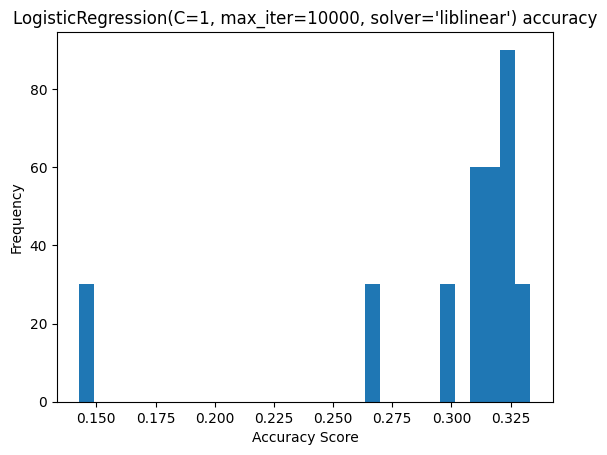

Model: SVC(C=10)
Accuracy: 0.3306937651093495
Precision: 0.14068362193362194
Recall: 0.27926406926406927
F1 Score: 0.17526312071766617


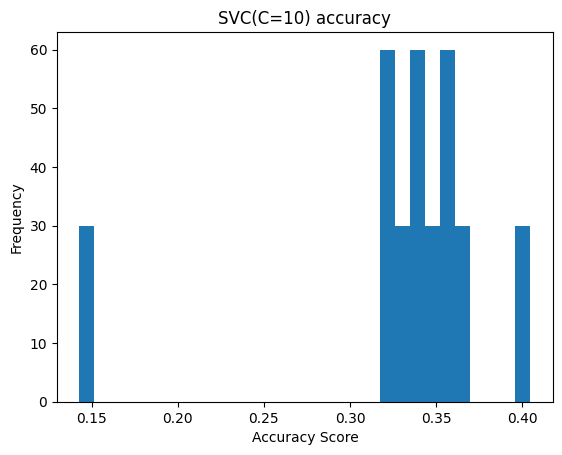

Model: DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=3)
Accuracy: 0.25555489183735935
Precision: 0.19070994812066241
Recall: 0.2059206692778121
F1 Score: 0.17992630073149551


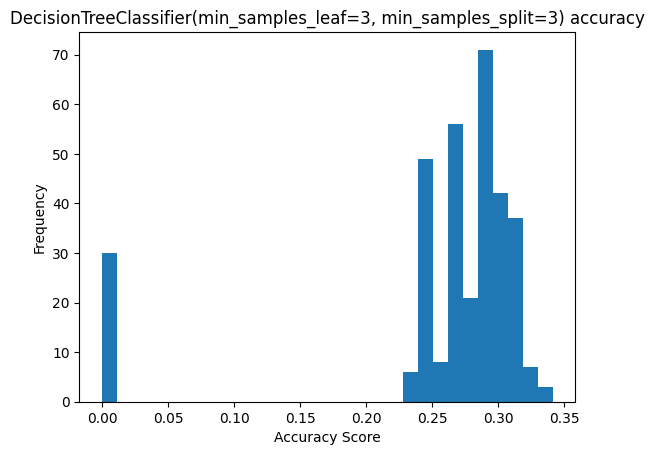

Model: RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=2,
                       n_estimators=8)
Accuracy: 0.23699327848678495
Precision: 0.203246775200509
Recall: 0.2390079594127213
F1 Score: 0.1895554640836344


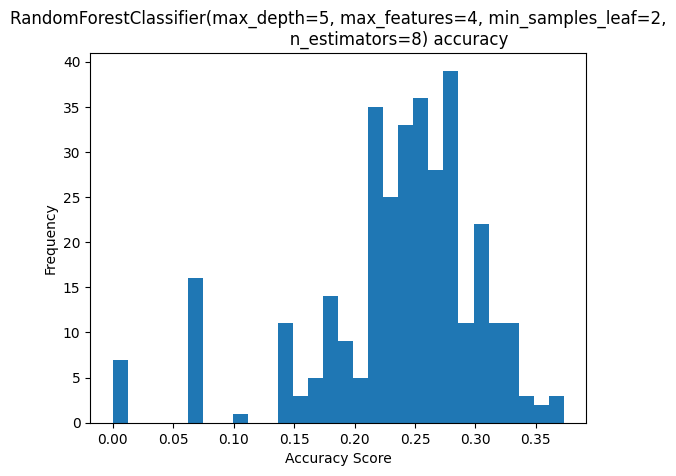

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

f = 0 # I really need to brush up on python huh?
for model in models:

    mean_accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for i in range(30):
        accuracy_scores = []
        for train_index, test_index in tscv.split(X):
            X_train, X_test = data_features[features_selected[f]].iloc[train_index], data_features[features_selected[f]].iloc[test_index]
            y_train, y_test = data_target.iloc[train_index], data_target.iloc[test_index]

            # Fit
            model.fit(X_train, y_train)
            # Predict!
            y_pred = model.predict(X_test)
            # FETCH!
            accuracy_scores.append(accuracy_score(y_test, y_pred)) # Is it possible to get the accuracy in a smart way outside of this annoying loop?
            mean_accuracy_scores.append(sum(accuracy_scores)/len(accuracy_scores))
            precision_scores.append(precision_score(y_test, y_pred,average='macro',zero_division=0))
            recall_scores.append(recall_score(y_test, y_pred,average='macro',zero_division=0))
            f1_scores.append(f1_score(y_test, y_pred,average='macro',zero_division=0))

    # Performance
    print(f"Model: {model}")
    print(f"Accuracy: {np.mean(mean_accuracy_scores)}")
    print(f"Precision: {np.mean(precision_scores)}")
    print(f"Recall: {np.mean(recall_scores)}")
    print(f"F1 Score: {np.mean(f1_scores)}")

    # Plot
    plt.hist(mean_accuracy_scores, bins=30)
    plt.title(f'{model} accuracy')
    plt.xlabel('Accuracy Score')
    plt.ylabel('Frequency')
    plt.show()

    f += 1

In [34]:
# Repeat for the dummy...
#for i in range(30):
#    # For each split
#    for train_index, test_index in tscv.split(X):
#        X_train, X_test = data_features[features_selected[0]].iloc[train_index], data_features[features_selected[0]].iloc[test_index]
#        y_train, y_test = data_target.iloc[train_index], data_target.iloc[test_index]
#
#        # Fit
#        bl_model.fit(y_train, y_train)
#        # Predict!
#        y_pred = bl_model.predict(X_test)
#        # FETCH!
#        accuracy_scores.append(accuracy_score(y_test, y_pred))
#        precision_scores.append(precision_score(y_test, y_pred,average='macro',zero_division=0))
#        recall_scores.append(recall_score(y_test, y_pred,average='macro',zero_division=0))
#        f1_scores.append(f1_score(y_test, y_pred,average='macro',zero_division=0))
# Print the baseline
#print(f"Model: {bl_model}")
#print(f"Accuracy: {np.mean(accuracy_scores)}")
#print(f"Precision: {np.mean(precision_scores)}")
#print(f"Recall: {np.mean(recall_scores)}")
#print(f"F1 Score: {np.mean(f1_scores)}")

# Hopefully the ugliest histogram
#plt.hist(accuracy_scores, bins=30)
#plt.title(f'{bl_model} accuracy')
#plt.xlabel('Accuracy Score')
#plt.ylabel('Frequency')
#plt.show()

# Model Generalization

In [35]:
# reloading models, just in case
    lr_model = LogisticRegression(max_iter=10000,solver='liblinear', C = 1 , penalty = 'l1')
svm_model = SVC(C = 1, gamma = 'scale',kernel = 'rbf')
dt_model = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 1, min_samples_split = 2)
rf_model = RandomForestClassifier(max_depth = 10, min_samples_leaf=2,min_samples_split=5,max_features = 5,n_estimators=4)
# Record the final results 30 times
f = 0
for model in models:

    mean_final_accuracy = []

    for i in range(30):
        for train_index, test_index in tscv.split(X):
            X_train, X_test = data_features[features_selected[f]].iloc[train_index], data_features[features_selected[f]].iloc[test_index]
            y_train, y_test = data_target.iloc[train_index], data_target.iloc[test_index]

            # Fit
            model.fit(X_train, y_train)
            # Predict!
            y_pred = model.predict(X_test)
    
        mean_final_accuracy.append(accuracy_score(y_test, y_pred))
        
    # Performance
    print(f"Model: {model}")
    print(f"Accuracy: {np.mean(mean_final_accuracy)}")
    f += 1 # DONT FORGET LOL

Model: LogisticRegression(C=1, max_iter=10000, solver='liblinear')
Accuracy: 0.2857142857142857
Model: SVC(C=10)
Accuracy: 0.2142857142857143
Model: DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=3)
Accuracy: 0.14285714285714285
Model: RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=2,
                       n_estimators=8)
Accuracy: 0.23333333333333334


# Consistency

In [36]:
# reloading models, just in case
lr_model = LogisticRegression(max_iter=10000,solver='liblinear', C = 1 , penalty = 'l1')
svm_model = SVC(C = 1, gamma = 'scale',kernel = 'rbf')
dt_model = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 1, min_samples_split = 2)
rf_model = RandomForestClassifier(max_depth = 10, min_samples_leaf=2,min_samples_split=5,max_features = 5,n_estimators=4)
# This time I will actually record the results, lets goooo. If someone is reading through my code, please do not judge me too hard...

# Repeat for each model
lr_accuracy = []
svm_accuracy = []
dt_accuracy = []
rf_accuracy = []

for i in range(30):
    # For each split    
    for train_index, test_index in tscv.split(X):
        X_train, X_test = data_features[features_selected[0]].iloc[train_index], data_features[features_selected[0]].iloc[test_index]
        y_train, y_test = data_target.iloc[train_index], data_target.iloc[test_index]
        # Fit 
        lr_model.fit(X_train, y_train)
        # Predict! 
        y_pred = lr_model.predict(X_test)
        # FETCH! 
        lr_accuracy.append((accuracy_score(y_test, y_pred)))
for i in range(30):
    # For each split    
    for train_index, test_index in tscv.split(X):
        X_train, X_test = data_features[features_selected[1]].iloc[train_index], data_features[features_selected[1]].iloc[test_index]
        y_train, y_test = data_target.iloc[train_index], data_target.iloc[test_index]
        # Fit 
        svm_model.fit(X_train, y_train)
        # Predict! 
        y_pred = svm_model.predict(X_test)
        # FETCH! 
        svm_accuracy.append((accuracy_score(y_test, y_pred)))
for i in range(30):
    # For each split    
    for train_index, test_index in tscv.split(X):
        X_train, X_test = data_features[features_selected[2]].iloc[train_index], data_features[features_selected[2]].iloc[test_index]
        y_train, y_test = data_target.iloc[train_index], data_target.iloc[test_index]
        # Fit 
        dt_model.fit(X_train, y_train)
        # Predict! 
        y_pred = dt_model.predict(X_test)
        # FETCH! 
        dt_accuracy.append((accuracy_score(y_test, y_pred)))
for i in range(30):
    # For each split    
    for train_index, test_index in tscv.split(X):
        X_train, X_test = data_features[features_selected[3]].iloc[train_index], data_features[features_selected[3]].iloc[test_index]
        y_train, y_test = data_target.iloc[train_index], data_target.iloc[test_index]
        # Fit 
        rf_model.fit(X_train, y_train)
        # Predict! 
        y_pred = rf_model.predict(X_test)
        # FETCH! 
        rf_accuracy.append((accuracy_score(y_test, y_pred)))

#len(lr_accuracy),len(svm_accuracy),len(dt_accuracy),len(rf_accuracy)

In [37]:
# Seperating BL because it feels so cursed
bl_accuracy = []

for i in range(30):
    for train_index, test_index in tscv.split(X):
        X_train, X_test = data['HR_std'].iloc[train_index], data['HR_std'].iloc[test_index]
        y_train, y_test = data_target.iloc[train_index], data_target.iloc[test_index]

        X_test = [1 for _ in X_test]

        bl_accuracy.append((accuracy_score(y_test,X_test)))

np.mean(bl_accuracy)

0.2727272727272727

In [38]:
(data['Frustrated'].value_counts())[1]/len(data['Frustrated']) # This somewhat adds up ?

0.26785714285714285

In [39]:
# Variance / Standard deviation

lr_std = np.std(lr_accuracy)
svm_std = np.std(svm_accuracy)
dt_std = np.std(dt_accuracy)
rf_std = np.std(rf_accuracy)
bl_std = np.std(bl_accuracy) # It should be noted The STD is probably not the best thing for this, but so be it.

# Present all of the findings:

print(f'Model = Logistic Regression')
print(f'Mean = {np.mean(lr_accuracy)}')
print(f'Standard Deviation = {lr_std}')
print(f'Variance = {np.var(lr_accuracy)}')
print(f'Model = Support Vector Machine')
print(f'Mean = {np.mean(svm_accuracy)}')
print(f'Standard Deviation = {svm_std}')
print(f'Variance = {np.var(svm_accuracy)}')
print(f'Model = Decision Tree')
print(f'Mean = {np.mean(dt_accuracy)}')
print(f'Standard Deviation = {dt_std}')
print(f'Variance = {np.var(dt_accuracy)}')
print(f'Model = Random Forest')
print(f'Mean = {np.mean(rf_accuracy)}')
print(f'Standard Deviation = {rf_std}')
print(f'Variance = {np.var(rf_accuracy)}')
print(f'Model = Guessing')
print(f'Mean = {np.mean(bl_accuracy)}')
print(f'Standard Deviation = {bl_std}')
print(f'Variance = {np.var(bl_accuracy)}')

Model = Logistic Regression
Mean = 0.28809523809523807
Standard Deviation = 0.14158706701848706
Variance = 0.020046897546897546
Model = Support Vector Machine
Mean = 0.3181818181818182
Standard Deviation = 0.17854191019308469
Variance = 0.031877213695395513
Model = Decision Tree
Mean = 0.2876623376623376
Standard Deviation = 0.18942164299547262
Variance = 0.035880558835104284
Model = Random Forest
Mean = 0.2606060606060606
Standard Deviation = 0.1567500128185592
Variance = 0.02457056651861847
Model = Guessing
Mean = 0.2727272727272727
Standard Deviation = 0.128564869306645
Variance = 0.01652892561983471


# Is there a significant performance difference?

In [40]:
from scipy.stats import kruskal

# If this is bad, then its whatever and we take the L
# If this is good, then I will get upset

kruskal(lr_accuracy,svm_accuracy,dt_accuracy,rf_accuracy,bl_accuracy)


KruskalResult(statistic=22.810091544207538, pvalue=0.00013818150751715737)

In [47]:
import scikit_posthocs as ph

dunnscheme = ph.posthoc_dunn([lr_accuracy,svm_accuracy,dt_accuracy,rf_accuracy,bl_accuracy],p_adjust = 'bonferroni')
dunnscheme.rename(index={1:'LR',2:'SVM',3:'DT',4:'RF',5:'BL'},columns={1:'LR',2:'SVM',3:'DT',4:'RF',5:'BL'})

,LR,SVM,DT,RF,BL
LR,1.000000,0.341422,1.000000,0.139982,1.000000
SVM,0.341422,1.000000,0.047307,0.000047,0.010258
DT,1.000000,0.047307,1.000000,0.799667,1.000000
RF,0.139982,0.000047,0.799667,1.000000,1.000000
BL,1.000000,0.010258,1.000000,1.000000,1.000000


In [49]:
display(dunnscheme < 0.05)

,1,2,3,4,5
1,False,False,False,False,False
2,False,False,True,True,True
3,False,True,False,False,False
4,False,True,False,False,False
5,False,True,False,False,False


Any value with 5e-03 or less could be considered that there is a significant differen between, these are:

LR to DT
LR to RF
LR to BL
SVM to DT
SVM to RF
SVM to BL
DT to BL
RF to BF

In [44]:
dunnscheme.to_latex()

'\\begin{tabular}{lrrrrr}\n\\toprule\n & 1 & 2 & 3 & 4 & 5 \\\\\n\\midrule\n1 & 1.000000 & 0.341422 & 1.000000 & 0.139982 & 1.000000 \\\\\n2 & 0.341422 & 1.000000 & 0.047307 & 0.000047 & 0.010258 \\\\\n3 & 1.000000 & 0.047307 & 1.000000 & 0.799667 & 1.000000 \\\\\n4 & 0.139982 & 0.000047 & 0.799667 & 1.000000 & 1.000000 \\\\\n5 & 1.000000 & 0.010258 & 1.000000 & 1.000000 & 1.000000 \\\\\n\\bottomrule\n\\end{tabular}\n'